In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt

#importing stationary test libraries for evaluting time series
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

import warnings
warnings.filterwarnings('ignore')


In [3]:
#read dataset
data = pd.read_csv("AirPassengers.csv")

In [4]:
data['Month'].head()

0    1949-01
1    1949-02
2    1949-03
3    1949-04
4    1949-05
Name: Month, dtype: object

In [5]:
#plotting number of passenger in accordance to the date using lambda function
data['Month'] = data['Month'].apply(lambda x: dt(int(x[:4]), int(x[5:]),15))
data = data.set_index('Month')
data.head()

,#Passengers
Month,
1949-01-15,112
1949-02-15,118
1949-03-15,132
1949-04-15,129
1949-05-15,121


In [6]:
#assigning time series data variable
ts = data['#Passengers']

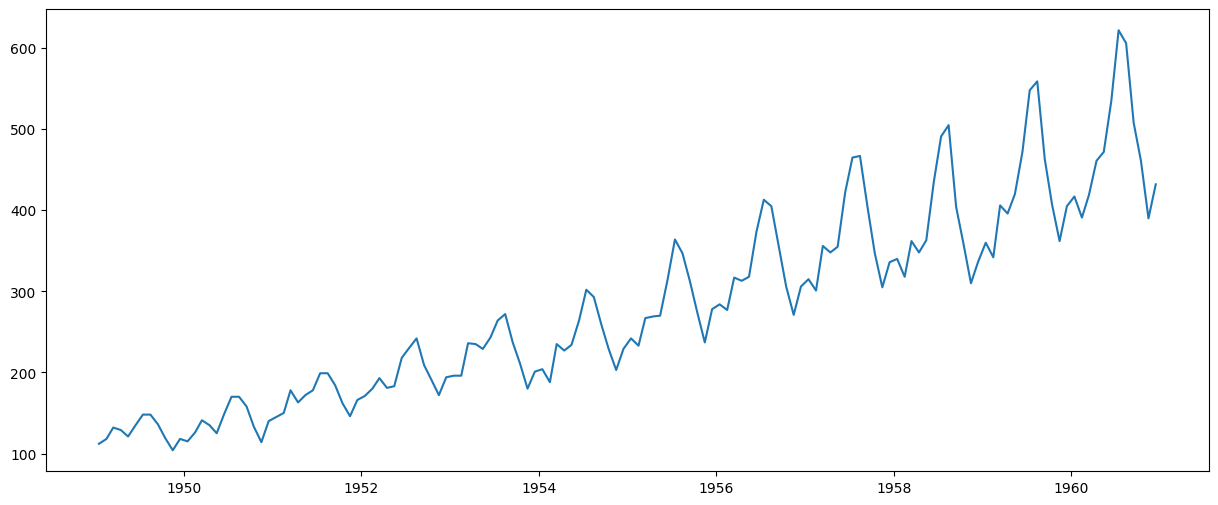

In [7]:
#plotting time series
plt.plot(ts)

In [8]:
#transforming series to stationary using log decompisition
ts_log = np.log(ts)

In [10]:
#writing functions to perform stationary checks (rolling stats & dickey fuller)
def test_stationarity(timeseries):
    # Calculate rolling mean with a window size of 52 (weeks)
    rolmean = timeseries.rolling(window=52, center=False).mean()

    # Calculate rolling standard deviation with the same window size
    rolstd = timeseries.rolling(window=52, center=False).std()

    # Plot the original time series, rolling mean, and rolling standard deviation
    orig = plt.plot(timeseries, color='blue', label="Original")
    mean = plt.plot(rolmean, color='red', label="Rolling Mean")
    std = plt.plot(rolstd, color='black', label="Rolling Std")
    plt.legend(loc='best')
    plt.title("Rolling Mean & Standard Deviation")
    plt.show(block=False)

    # Perform the Dickey-Fuller test
    print("Results of Dickey-Fuller Test: ")

    # Calculate test statistics and related information using the AIC method
    dftest = adfuller(timeseries, autolag='AIC')

    # Create a Series to store test statistics and critical values
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", "p-value", "#Lags Used",
                                              "Number of Observations Used"])

    # Iterate through critical values and add them to the output Series
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

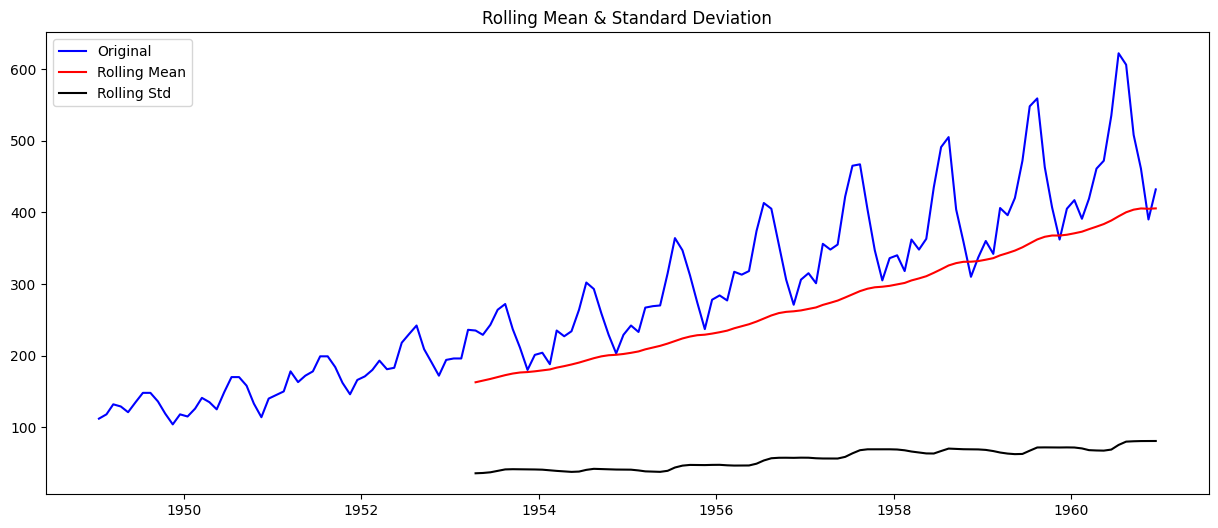

Results of Dickey-Fuller Test: 
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [11]:
#apply data to function and see results of stationarity
test_stationarity(data['#Passengers'])

By Observing plot and Dickey Fuller test, the plot is higher than critical value and moving average is not constant overtime. This shows that the time series is not stationary.

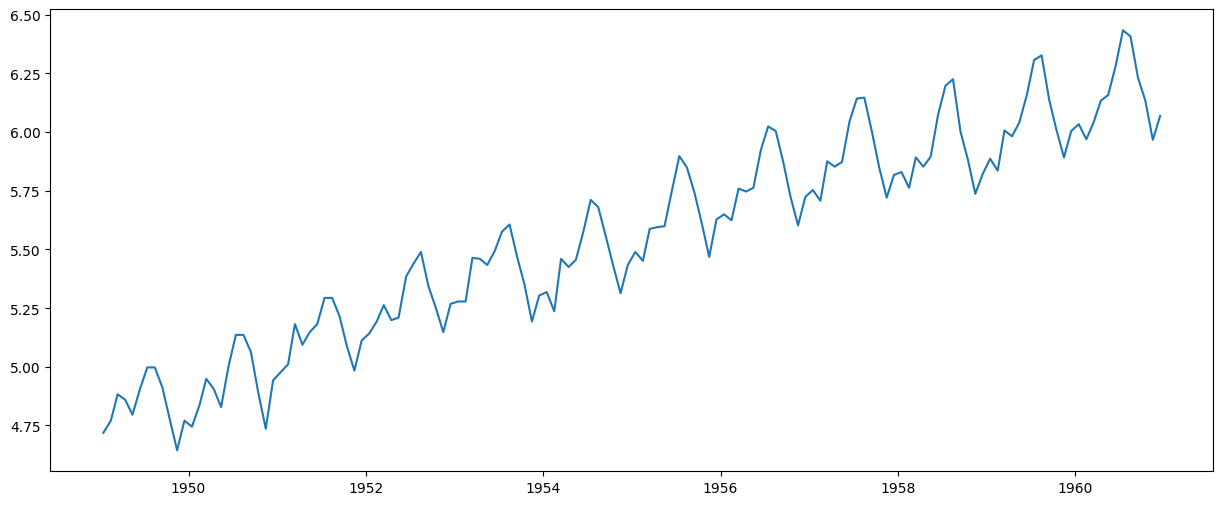

In [12]:
#decomposing data, plotting moving avg
plt.plot(ts_log)

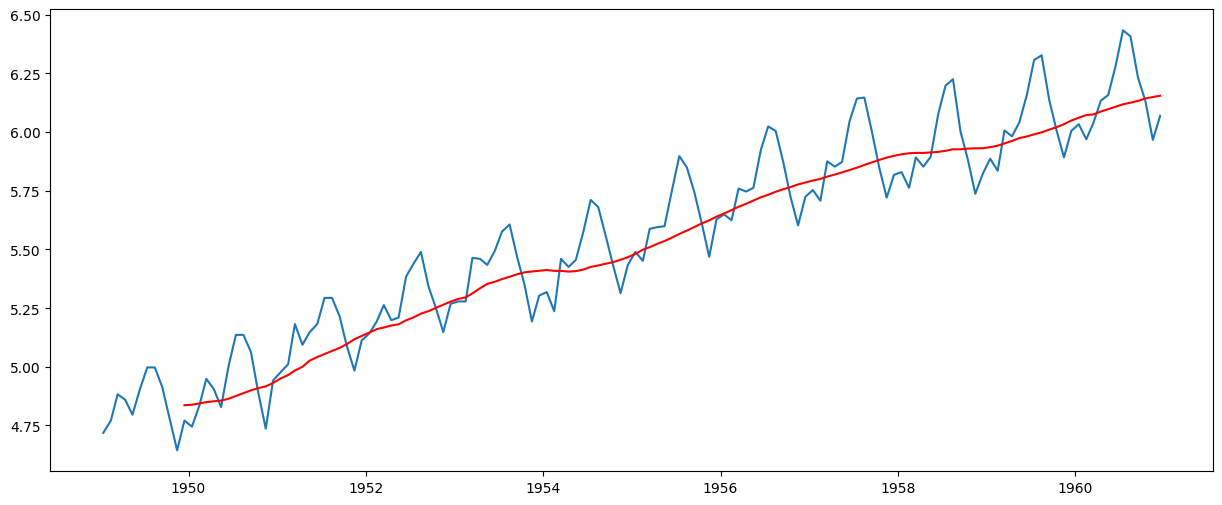

In [13]:
#init moving avg var
movingAverage = ts_log.rolling(window=12).mean()

#init moving std var
movingSTD = ts_log.rolling(window=12).std()

#plotting data
plt.plot(ts_log)

#plotting moving avg
plt.plot(movingAverage, color = 'red')

In [15]:
ts_log_mv_diff = ts_log - movingAverage
ts_log_mv_diff.head(12)

#drop null value from time series data
ts_log_mv_diff.dropna(inplace = True)
ts_log_mv_diff.head(10)

Month
1949-12-15   -0.065494
1950-01-15   -0.093449
1950-02-15   -0.007566
1950-03-15    0.099416
1950-04-15    0.052142
1950-05-15   -0.027529
1950-06-15    0.139881
1950-07-15    0.260184
1950-08-15    0.248635
1950-09-15    0.162937
Name: #Passengers, dtype: float64

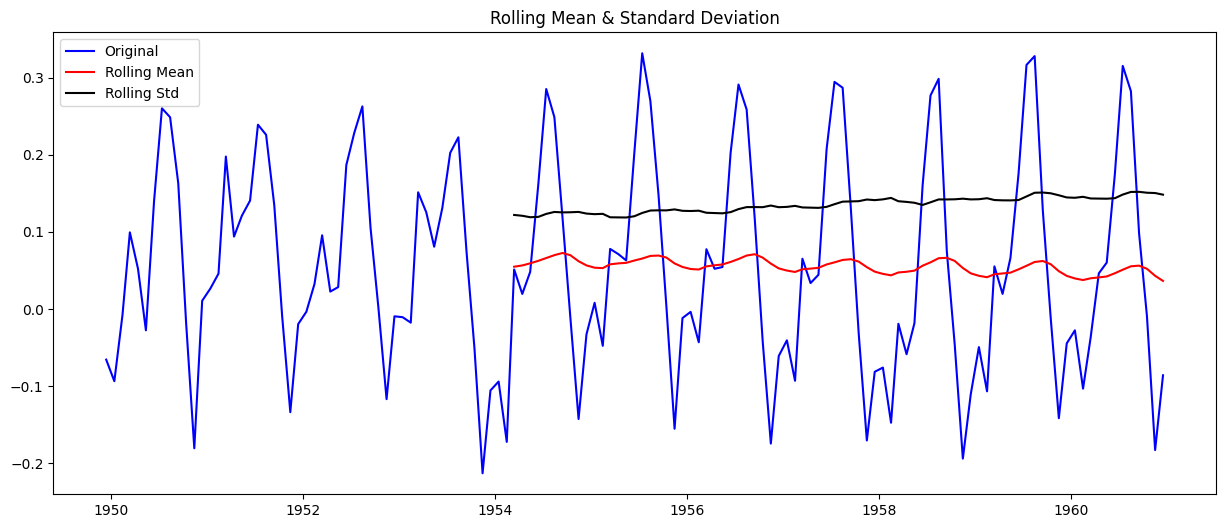

Results of Dickey-Fuller Test: 
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [16]:
#testing staionarity test on new test stats
test_stationarity(ts_log_mv_diff)

In [ ]:
Tests show that the Dickey-Fuller test is less than 1% less than its critical value, which tells us that we are 99% confident that this is stationary.